<a href="https://colab.research.google.com/github/cyrus2281/notes/blob/main/MachineLearning/Linear-and-Logistic-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Content

>[Content](#scrollTo=t-ulf8DYQ5CW)

>[Linear Regression](#scrollTo=YfBsGgZJOW6x)

>>[Terminologies](#scrollTo=FlKJXFiGEnP_)

>>[1-D Linear Regression](#scrollTo=KRRk9KPZddTH)

>>>[Sum of Squared Error](#scrollTo=ooJ9wXZlVMBX)

>>>[Simple Linear Regression](#scrollTo=b6OxhYG9Vf7S)

>>>[Minimizing the Error](#scrollTo=WXFUCUPtVrnn)

>>>>[Python Implementation](#scrollTo=Dj7dHYfTetu8)

>>>[$R^2$](#scrollTo=kJ23279OmL75)

>>>>[Python Implementation](#scrollTo=YRiuO0SHnoCR)

>>[Moore's Law Example](#scrollTo=6fzU4ugEokDF)

>>[Multi-Dimensional Linear Regression](#scrollTo=Ljya_k7sogtf)

>>>[Minimizing the Error](#scrollTo=-mlLWLGat0JA)

>>>>[Python Implementation](#scrollTo=7Sa6VoMMuXWb)

>>>>[Polynomial Regression Example](#scrollTo=2rAKAaDH5n7g)

>>[Gradient Descent](#scrollTo=C_TeZKxiJWGQ)

>>>[Gradient Descent for Linear Regression](#scrollTo=VN0CiwE4Llgx)

>>[Regularization](#scrollTo=F-lbTCnKHAtN)

>>>[L2 Regularization](#scrollTo=-9yf1_5BFqa0)

>>>>[Python Implementation](#scrollTo=FVnHupKeHXM1)

>>>[L1 Regularization](#scrollTo=dabKBr7nNZCr)

>>>>[Python Implementation](#scrollTo=TfYPtfJsNc2W)

>>>[Elastic Net Regularization](#scrollTo=Ml020J9hTYNm)

>>>[Regularization Comparison](#scrollTo=B3IEkXacR-r4)

>[Logistic Regression](#scrollTo=jihCDi-jUnpb)

>>[Activation Functions](#scrollTo=RwYc-QslW1rw)

>>>[Hyperbolic Tangent](#scrollTo=UursZp22WGDs)

>>>[Sigmoid](#scrollTo=pQOxSH3iWJnZ)

>>>>[Python Implementation](#scrollTo=2glAfgzhXCGU)

>>[Bayes' Rule](#scrollTo=pHghf7kvfHc1)

>>[Cross Entropy](#scrollTo=A9fdpLZwlM1V)

>>>[Python Implementation](#scrollTo=zKvZ_bPip2Pd)

>>>[Maximum Likelihood](#scrollTo=TWuWNInmrPcP)

>>>[Minimizing Cost](#scrollTo=FYYp--zjs9a9)

>>>>[Python Implementation](#scrollTo=BVe1xNnCwe0W)

>[Resources](#scrollTo=VfoGOoaFSkUf)



# Linear Regression


## Terminologies

**Data**

- X for input
- Y for targets
- X is an NxD matrix
- N is number of samples
- D is number of features
- Y is an N-length vector


**Parameters**

- m, α, or w for slope/feature weight
- b or β for intercept/bias

**Error**

- Error also known as Cost, or Objective
- Error or Cost is how wrong the model predictions are.
- We always want to minimize this
- E, C, or J are mostly used for cost

**Linear Regression**
> The line that best fits the data


## 1-D Linear Regression

**Slope**

> Rise over run
$$
M = \frac{\Delta y}{\Delta x} = y'
$$

**Line**

$$
\hat y_i = ax_i  + b
$$

### Sum of Squared Error

$$
E = \sum_{i=1}^N (y_i - \hat y_i)^2
$$

### Simple Linear Regression

$$
E = \sum_{i=1}^N (y_i - (ax_i  + b))^2
$$

### Minimizing the Error

Derivative of $E$ wrt $a$:

$$
\frac{\partial E}{\partial a} = \sum_{i=1}^N 2 (y_i - ax_i  - b)(-x_i) = 0 \\
- \sum_{i=1}^N y_i x_i + a\sum_{i=1}^N  x_i^2 + b\sum_{i=1}^N x_i = 0 \\
a\sum_{i=1}^N  x_i^2 + b\sum_{i=1}^N x_i = \sum_{i=1}^N y_i x_i \\
$$

Derivative of $E$ wrt $b$:

$$
\frac{\partial E}{\partial b} = \sum_{i=1}^N 2(-1)(y_i - ax_i  - b) = 0 \\
- \sum_{i=1}^N y_i + a \sum_{i=1}^N  x_i + N b = 0 \\
a \sum_{i=1}^N  x_i + N b =  \sum_{i=1}^N y_i\\
$$

We can conclude:

$$
\left . \begin{matrix}
a \sum_{i=1}^N  x_i^2 + b\sum_{i=1}^N x_i = \sum_{i=1}^N y_i x_i \\
a \sum_{i=1}^N  x_i +  b N =  \sum_{i=1}^N y_i\\
\end{matrix} \right \} \Rightarrow \\[1cm]
b = \frac{\sum_{i=1}^N x_i \sum_{i=1}^N y_i x_i -\sum_{i=1}^N y_i \sum_{i=1}^N  x_i^2}{(\sum_{i=1}^N x_i)^2 - N \sum_{i=1}^N  x_i^2} \\[1cm]
a = \frac{N \sum_{i=1}^N y_ix_i -\sum_{i=1}^N x_i \sum_{i=1}^N y_i}{N \sum_{i=1}^N  x_i^2 - (\sum_{i=1}^N x_i)^2} \\[1cm]
$$


Simlify by using sample mean:
$
\bar x = \frac{1}{N} \sum_{i=1}^N x_i \\[1cm]
$

$$
a = \frac{ \bar{xy} - \bar x \bar y}{\bar{x^2} - {\bar x}^2} \\
b = \frac{ \bar{y}\bar{x^2} - \bar x \bar{xy}}{\bar{x^2} - {\bar x}^2} \\
$$

#### Python Implementation

In [ ]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/linear_regression_class/data_1d.csv

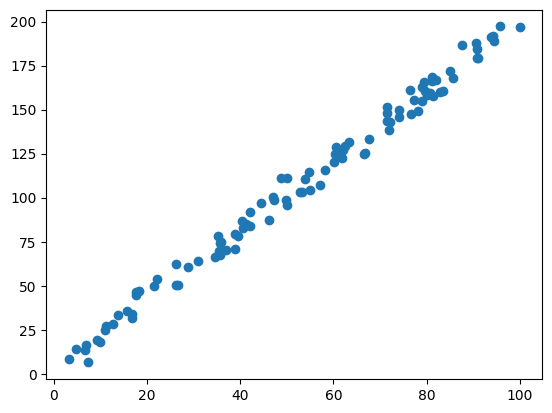

In [ ]:
# shows how linear regression analysis can be applied to 1-dimensional data
# https://deeplearningcourses.com/c/data-science-linear-regression-in-python

import numpy as np
import matplotlib.pyplot as plt

# Load the data
X = []
Y = []
for line in open('data_1d.csv'):
  x, y = line.split(",")
  X.append(float(x))
  Y.append(float(y))

# Let's turn X and Y into numpy array
X = np.array(X)
Y = np.array(Y)

# Plot to see what it looks like
plt.scatter(X,Y)
plt.show()

Equations

$$
a = \frac{N \sum_{i=1}^N y_ix_i -\sum_{i=1}^N x_i \sum_{i=1}^N y_i}{N \sum_{i=1}^N  x_i^2 - (\sum_{i=1}^N x_i)^2}
\\[1cm]
b = \frac{\sum_{i=1}^N x_i \sum_{i=1}^N y_i x_i -\sum_{i=1}^N y_i \sum_{i=1}^N  x_i^2}{(\sum_{i=1}^N x_i)^2 - N \sum_{i=1}^N  x_i^2}
\\[2cm]
a = \frac{\sum_{i=1}^N y_ix_i - \frac{1}{N} \sum_{i=1}^N x_i \ \sum_{i=1}^N y_i}{ \sum_{i=1}^N  x_i^2 - \frac{1}{N}(\sum_{i=1}^N x_i)(\sum_{i=1}^N x_i)}
\\[1cm]
b = \frac{\frac{1}{N}\sum_{i=1}^N y_i \ \sum_{i=1}^N  x_i^2 - \frac{1}{N} \sum_{i=1}^N x_i \ \sum_{i=1}^N y_i x_i}{ \sum_{i=1}^N  x_i^2 - \frac{1}{N}(\sum_{i=1}^N x_i)(\sum_{i=1}^N x_i)}
$$

In [ ]:
# Apply the equation to calculate a and b
denominator = X.dot(X) - X.mean() * X.sum()

a = (X.dot(Y) - Y.mean() * X.sum()) / denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator

<function matplotlib.pyplot.show(close=None, block=None)>

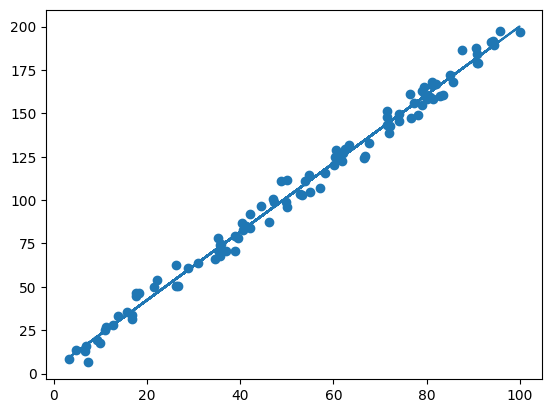

In [ ]:
# Calculate predicted Y
Yhat = a*X + b

# plot it all
plt.scatter(X,Y)
plt.plot(X, Yhat)
plt.show

### $R^2$

A Mean to test the accuracy of the model

$$
R^2 = 1 - \frac{\text{Sum of squares residuals}}{\text{Sum of squares total}} \\
$$

- Sum of squares residuals: $\sum_i (y_i - \hat y_i)^2$
- Sum of squares total: $\sum_i (y_i - \bar y)^2$

\

If Sum of squares residuals is close to zero, $R^2$ will be close to 1.

- $R^2=1$ means a perfect model.
- $R^2=0$ basically means just the average of y.
- $R^2<0$ means the model is worse than just predicting the mean.

#### Python Implementation

The follwoing code depends on `Minimizing the Error` section code to be ran first

In [ ]:
# Calculate the r2

d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)

print("the r-squared is:", r2)

the r-squared is: 0.9911838202977805


## Moore's Law Example

Since Moore's law is exponentional, we will be using the log of Y values (transistors) on the y-axis

In [ ]:
!wget https://github.com/lazyprogrammer/machine_learning_examples/raw/master/linear_regression_class/moore.csv

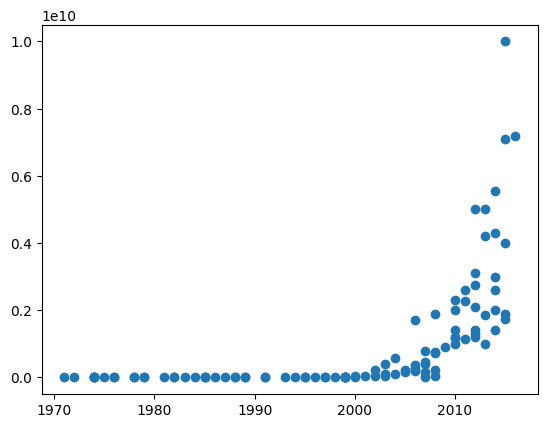

In [ ]:
# shows how linear regression analysis can be applied to moore's law
# https://deeplearningcourses.com/c/data-science-linear-regression-in-python

import re
import numpy as np
import matplotlib.pyplot as plt

X = []
Y = []

# some numbers show up as 1,170,000,000 (commas)
# some numbers have references in square brackets after them
non_decimal = re.compile(r'[^\d]+')

for line in open('moore.csv'):
    r = line.split('\t')

    x = int(non_decimal.sub('', r[2].split('[')[0]))
    y = int(non_decimal.sub('', r[1].split('[')[0]))
    X.append(x)
    Y.append(y)


X = np.array(X)
Y = np.array(Y)

plt.scatter(X, Y)
plt.show()

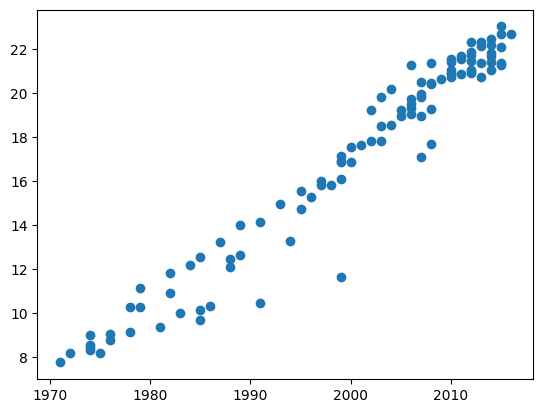

In [ ]:
Y = np.log(Y)
plt.scatter(X, Y)
plt.show()

In [ ]:
# copied from lr_1d.py
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator

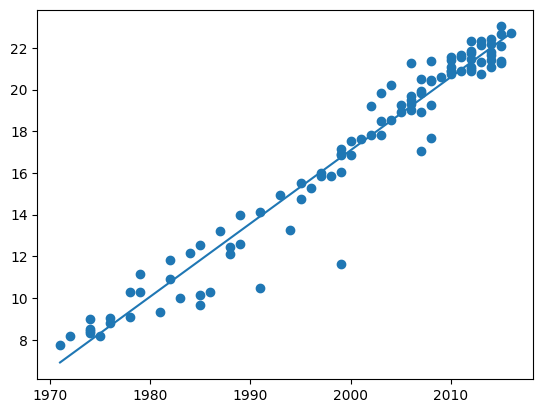

In [ ]:
# let's calculate the predicted Y
Yhat = a*X + b

plt.scatter(X, Y)
plt.plot(X, Yhat)
plt.show()

In [ ]:
# determine how good the model is by computing the r-squared
d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print("a:", a, "b:", b)
print("the r-squared is:", r2)


a: 0.35104357336499337 b: -685.0002843816548
the r-squared is: 0.9529442852285758


In [ ]:
# how long does it take to double?
# log(transistorcount) = a*year + b
# transistorcount = exp(b) * exp(a*year)
# 2*transistorcount = 2 * exp(b) * exp(a*year) = exp(ln(2)) * exp(b) * exp(a * year) = exp(b) * exp(a * year + ln(2))
# a*year2 = a*year1 + ln2
# year2 = year1 + ln2/a
print("time to double:", np.log(2)/a, "years")

time to double: 1.974533172379868 years


## Multi-Dimensional Linear Regression

For a simple linear regression, we have:

$
\hat y = wx + b
$


Now if x is a matrix of size N×D, where N is the number of samples and D is the number of inputs/features, the model would be:

$$
\hat y = w^Tx + b
$$

- b: is a number
- w: is a vector of length D


### Minimizing the Error

The error function doesn't change, only the expression for prediction does:

$$
E = \sum_{i=1}^N (y_i - \hat y_i)^2
= \sum_{i=1}^N (y_i - w^Tx_i)^2 \\
$$

Solving for w

Note: $a^Tb = \sum_{i=1}^N a_ib_i$

\

$$
\frac{\partial E}{\partial w} = \sum_{i=1}^N 2 (y_i -  w^Tx_i)(-x_i) = 0 \\
w^T\sum_{i=1}^N x_ix_i =  \sum_{i=1}^N y_i x_i \\
w^T (x^Tx) = y^Tx \\
(x^Tx) w = x^Ty \\
w = \frac{x^Ty}{x^Tx}
$$

Numpy has a function that just do this

```python
Ax = b → x = np.linalg.solve(A,b)
w = x.T * y / (x.T * x) → w = np.linalg.solve(x.T * x, x.T * y)
```

#### Python Implementation

In [ ]:
!wget https://github.com/lazyprogrammer/machine_learning_examples/raw/master/linear_regression_class/data_2d.csv

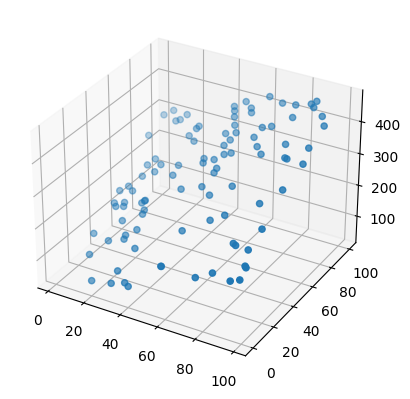

In [ ]:
# shows how linear regression analysis can be applied to 2-dimensional data
# https://deeplearningcourses.com/c/data-science-linear-regression-in-python

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


# load the data
X = []
Y = []
for line in open('data_2d.csv'):
    x1, x2, y = line.split(',')
    X.append([float(x1), float(x2), 1]) # add the bias term
    Y.append(float(y))

# let's turn X and Y into numpy arrays since that will be useful later
X = np.array(X)
Y = np.array(Y)


# let's plot the data to see what it looks like
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

In [ ]:
# apply the equations we learned to calculate a and b
# numpy has a special method for solving Ax = b
# so we don't use x = inv(A)*b
# note: the * operator does element-by-element multiplication in numpy
#       np.dot() does what we expect for matrix multiplication
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
Yhat = np.dot(X, w)

In [ ]:
# determine how good the model is by computing the r-squared
d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print("the r-squared is:", r2)

the r-squared is: 0.9980040612475778


#### Polynomial Regression Example

In [ ]:
!wget https://github.com/lazyprogrammer/machine_learning_examples/raw/master/linear_regression_class/data_poly.csv

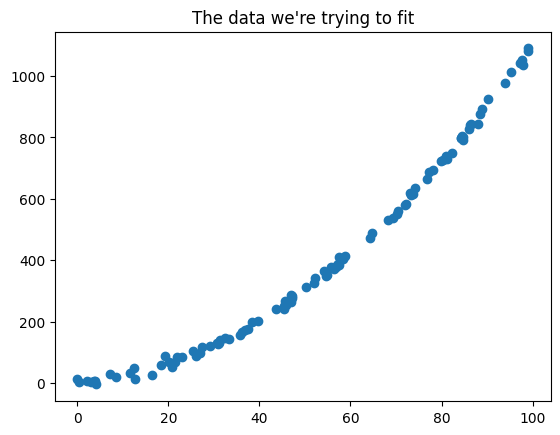

In [ ]:
# shows how linear regression analysis can be applied to polynomial data
# https://deeplearningcourses.com/c/data-science-linear-regression-in-python
import numpy as np
import matplotlib.pyplot as plt


# load the data
X = []
Y = []
for line in open('data_poly.csv'):
    x, y = line.split(',')
    x = float(x)
    X.append([1, x, x*x]) # add the bias term x0 = 1
    # our model is therefore y_hat = w0 + w1 * x + w2 * x**2
    Y.append(float(y))

# let's turn X and Y into numpy arrays since that will be useful later
X = np.array(X)
Y = np.array(Y)

# let's plot the data to see what it looks like
plt.scatter(X[:,1], Y)
plt.title("The data we're trying to fit")
plt.show()

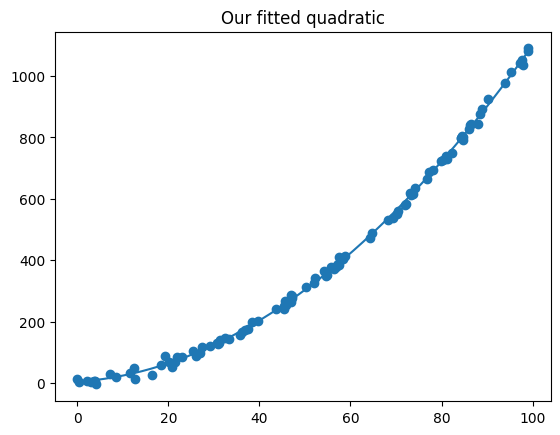

In [ ]:
# apply the equations we learned to calculate a and b
# numpy has a special method for solving Ax = b
# so we don't use x = inv(A)*b
# note: the * operator does element-by-element multiplication in numpy
#       np.dot() does what we expect for matrix multiplication
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))

# let's plot everything together to make sure it worked
plt.scatter(X[:,1], Y)

# to plot our quadratic model predictions, let's
# create a line of x's and calculate the predicted y's
x_line = np.linspace(X[:,1].min(), X[:,1].max())
y_line = w[0] + w[1] * x_line + w[2] * x_line * x_line
plt.plot(x_line, y_line)
plt.title("Our fitted quadratic")
plt.show()

In [ ]:
# determine how good the model is by computing the r-squared
Yhat = X.dot(w)
d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print("the r-squared is:", r2)

the r-squared is: 0.9991412296366858


## Gradient Descent

Optimization method: Used extensively in deep learning, useful in a wide variety of situations for finding local maxima/minima of a differentiable function.

Idea:
- You have a function you want to minimize, J(w)=cost or error
- Iteratively update w, in the direction of dJ(w)/dw, in small steps
- Can maximize things too by just switching signs

```
w ← random initial value
while not converged:
  w ← w - η ∇w J(w)
```

Example:

Equation $J = w^2$
- We know min is at w=0, but let's solve for it

$dJ/dw = 2w$, set initial $w=20$, learning rate 0.1

Formula: $w ← w - 0.1 × dJ/dw$

- Iteration 1: $w \leftarrow 20 - 0.1*40 = 16$
- Iteration 2: $w \leftarrow 16 - 0.1*32 = 12.8$
- Iteration 3: $w \leftarrow 12.8 - 0.1*2*12.8 = 10.24$
- ...
- Iteration 30: $w \leftarrow 0.03 - 0.1*2*0.03 = 0.24$

### Gradient Descent for Linear Regression

Cost function to minimize:
$$
J = (Y-Xw)^T (Y-Xw) \\
$$

Gradient:
$$
\partial J / \partial w = -2X^TY + 2X^TXw = 2X^T(\hat Y - Y) \\
$$

Instead of setting it to 0 and solving for w, we will just take small steps in this direction. Can drop the 2 since it's just a constant

```python
w = draw sample from N(0, 1/D)
for t=1..T:
  w = w - learning_rate * X.T (Y_hat - Y)

```

## Regularization

> Regularization: Approach to reduce complexity of model and prevent from overfitting to outliers

### L2 Regularization

> Penalize large weights by adding their squared magnitude to the cost. Also called *"Ridge Regression"*.

$$
J_{\text{Ridge}} = \sum_{n=1}^N (y_n - \hat y_n)^2 + \lambda |w|^2 \\
|w|^2 = w^Tw= w_1^2 + w_2^2 + \cdots + w_D^2
$$

Solving for w

$$
J = (Y-Xw)^T (Y-Xw) + \lambda w^Tw \\
J = Y^TY - 2Y^TXw + w^TX^TXw + \lambda w^Tw \\
\partial J / \partial w = -2X^TY + 2X^TXw + 2\lambda w = 0 \\
w= (\lambda I + X^TX)^{-1} X^TY
$$

#### Python Implementation

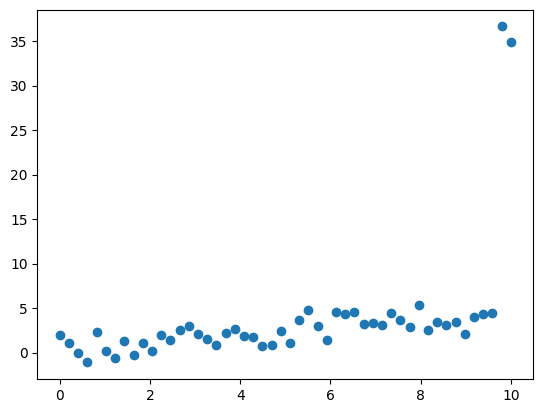

In [ ]:
# demonstration of L2 regularization
# https://deeplearningcourses.com/c/data-science-linear-regression-in-python
import numpy as np
import matplotlib.pyplot as plt

N = 50

# generate the data
X = np.linspace(0,10,N)
Y = 0.5*X + np.random.randn(N)

# make outliers
Y[-1] += 30
Y[-2] += 30

# plot the data
plt.scatter(X, Y)
plt.show()

$$
w= (X^TX)^{-1} X^TY
$$

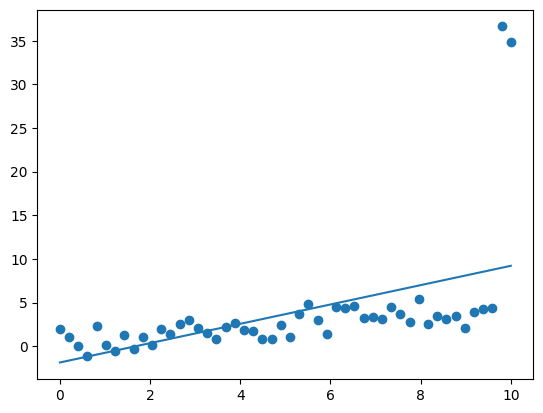

In [ ]:
# add bias term
X = np.vstack([np.ones(N), X]).T

# plot the maximum likelihood solution
w_ml = np.linalg.solve(X.T.dot(X), X.T.dot(Y))
Yhat_ml = X.dot(w_ml)
plt.scatter(X[:,1], Y)
plt.plot(X[:,1], Yhat_ml)
plt.show()

$$
w= (\lambda I + X^TX)^{-1} X^TY
$$

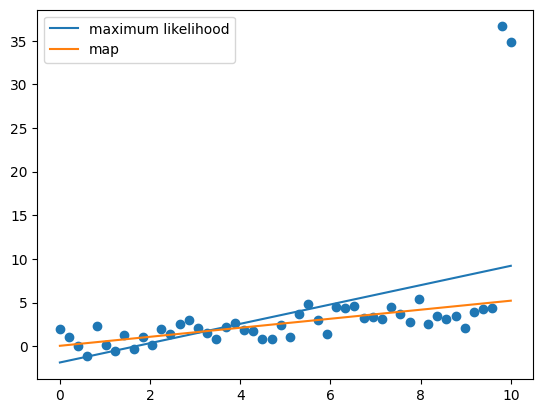

In [ ]:
# plot the regularized solution
# probably don't need an L2 regularization this high in many problems
# everything in this example is exaggerated for visualization purposes
l2 = 1000.0
w_map = np.linalg.solve(l2*np.eye(2) + X.T.dot(X), X.T.dot(Y))
Yhat_map = X.dot(w_map)
plt.scatter(X[:,1], Y)
plt.plot(X[:,1], Yhat_ml, label='maximum likelihood')
plt.plot(X[:,1], Yhat_map, label='map')
plt.legend()
plt.show()

### L1 Regularization

Ideally number of features (D) is much less than the number of samples (N), but when it's the opposite, we want to select a small number of important features that predict the trend, and ignore the noise.

- This is called "Sparsity"
- Most weights will be 0
- Few weights will be non-zero

**L1 Regularization**

$$
J_{\text{Lasso}} = \sum_{n=1}^N (y_n - \hat y_n)^2 + \lambda |w| \\
$$

Solving for w

$$
J = (Y-Xw)^T (Y-Xw) + \lambda |w| \\
J = Y^TY - 2Y^TXw + w^TX^TXw + \lambda |w| \\
\partial J / \partial w = -2X^TY + 2X^TXw + \lambda \text{sign} (w) = 0 \\
$$

- $\text{sign} (x)  = 1 \text{ if } x > 0, -1 \text{ if } x<0, 0 \text{ if } x = 0$

#### Python Implementation

In [ ]:
# notes for this course can be found at:
# https://deeplearningcourses.com/c/data-science-linear-regression-in-python
import numpy as np
import matplotlib.pyplot as plt

N = 50
D = 50

# uniformly distributed numbers between -5, +5
X = (np.random.random((N, D)) - 0.5)*10

# true weights - only the first 3 dimensions of X affect Y
true_w = np.array([1, 0.5, -0.5] + [0]*(D - 3))

# generate Y - add noise
Y = X.dot(true_w) + np.random.randn(N)*0.5

$$
J = Y^TY - 2Y^TXw + w^TX^TXw + \lambda |w| \\
\partial J / \partial w = -2X^TY + 2X^TXw + \lambda \text{sign} (w) = 0 \\
$$

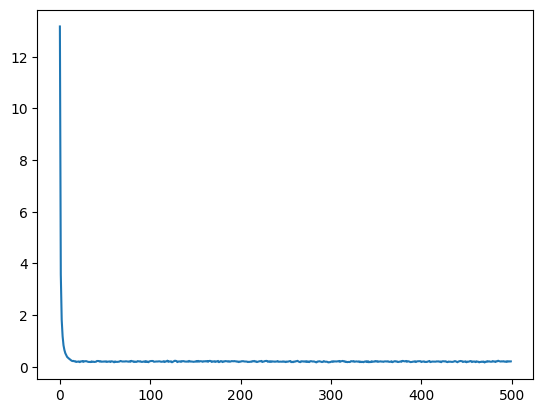

In [ ]:
# perform gradient descent to find w
costs = [] # keep track of squared error cost
w = np.random.randn(D) / np.sqrt(D) # randomly initialize w
# Diving by the square root of D help with normalizing
# the random weight to not be too big

learning_rate = 0.001
l1 = 10.0 # Also try 5.0, 2.0, 1.0, 0.1 - what effect does it have on w?
for t in range(500):
  # update w
  Yhat = X.dot(w)
  delta = Yhat - Y
  w = w - learning_rate*(X.T.dot(delta) + l1*np.sign(w))

  # find and store the cost
  mse = delta.dot(delta) / N
  costs.append(mse)

# plot the costs
plt.plot(costs)
plt.show()

final w: [ 9.84896562e-01  4.37952666e-01 -4.24058584e-01  1.23571953e-02
 -7.24486955e-04 -6.50770748e-03 -2.21650029e-02 -2.13568126e-03
  7.79659788e-03  4.11913269e-03 -2.26832873e-02 -5.14857992e-03
 -6.59051352e-03  1.44625498e-03 -1.99006645e-02  1.26699404e-02
  5.84299094e-03  9.19653250e-03  1.34247639e-02 -1.28900944e-02
  1.75109112e-02  1.67905670e-04  2.10423122e-03 -1.28837057e-03
 -5.88086214e-03 -1.77549880e-02  1.70412908e-02  3.68170021e-02
  3.93645351e-03  2.18546363e-02 -3.81837393e-03 -3.04204882e-02
 -1.63956202e-02 -5.91297718e-03  6.49597046e-05 -4.92764575e-03
 -6.64501162e-03 -1.33182474e-04 -1.32854755e-02  3.90817919e-04
  1.02251108e-03 -7.35584481e-03 -1.99381208e-02 -4.25025984e-03
  1.25606750e-02 -3.10995557e-04  5.18583235e-03  1.33750780e-02
 -3.14876926e-02  1.81269792e-02]


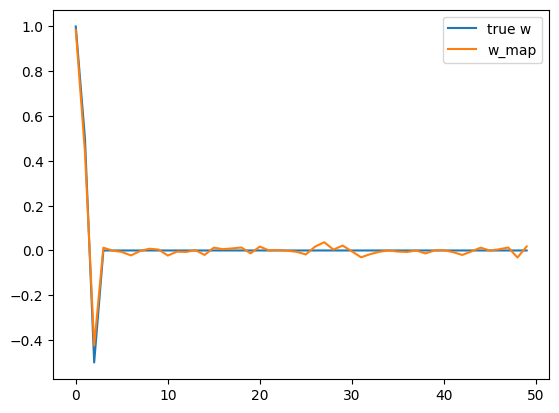

In [ ]:
print("final w:", w)

# plot our w vs true w
plt.plot(true_w, label='true w')
plt.plot(w, label='w_map')
plt.legend()
plt.show()

### Elastic Net Regularization

Using L1 and L2 regularization simultaneously.

$$
J_{\text{elasticnet}} = J + \lambda_1 |w| + \lambda_2 |w|^2 \\
$$

### Regularization Comparison

- L1: encourages a sparse solution (few w's non-zero, many equal to 0)
- L2: encourages small weights (all w's close to 0, but not exactly 0)
- Both help you prevent overfitting, by not fitting to noise
  - L1 accomplishes this by choosing the most important features
  - L2 accomplishes this by making the assertion that none of the weights are extermely large

L2 penalty is quadratic, L1 is absolute function Key is the derivative (since the solution uses gradient descent)

Quadratic: as w → 0, derivative → 0

If w is already small, further gradient descent won';t change it much

Absolute: derivative is always +/-1 (0 at w=0)

Doesn't matter where w is, it will fall at a constant rate When it reaches 0, it stays there forever!

# Logistic Regression

For 2D classification:
- the horizontal axis is $x_1$
- the vertical axis is $x_2$

$x_2 = mx_1 + b$ can be rewritten as:

$$
w_1x_1 + w_2x_2 + b = 0
$$

If we set that equal to $
w_1x_1 + w_2x_2 + b = a
$, we'd get:
- if $a \ge 0 \rightarrow$ predict 1
- if $a < 0 \rightarrow$ predict 0

\

Mathematically, it can be written as a step function (only 1 or 0)
$
\hat y = u(a), \quad a= w_1x_1 + w_2x_2 + b
$

\

We interpret this output as *the probability that y=1 given x*.

To make prediction, we round, e.g.: if $p(y=1|x) \ge 50\% \rightarrow$ 1, else 0

**Logistic Regression**

$$
p(y=1|x)= \sigma(w_1x_1 + w_2x_2 + b ) \\
$$

Sigmoid function is also sometimes called logistic function.

Its argument is called **"logit"**, although a more modern name is "**activation**"

\

For $n$ number of inputs, we can generalize the formula as:

$$
p(y=1|x)= \sigma(w^Tx + b ) = \sigma(\sum_{d=1}^Dw_dx_d + b) \\
$$

\

σ is usually a hyperbolic tangent function or a sigmoid function.

## Activation Functions


### Hyperbolic Tangent

$$
\tanh(a) = \frac{\exp(2a)-1}{\exp(2a)+1} \\[1cm]
\tanh(a) \in (-1, 1)
$$

![tanh](https://images.squarespace-cdn.com/content/v1/5acbdd3a25bf024c12f4c8b4/1524687495762-MQLVJGP4I57NT34XXTF4/TanhFunction.jpg?format=1500w)

### Sigmoid

$$
\sigma(a) = \frac{1}{1+\exp(-a)} \\
\sigma(a) \in (0, 1) \\
$$

![sigmoid](https://miro.medium.com/v2/resize:fit:640/format:webp/1*Xu7B5y9gp0iL5ooBj7LtWw.png)



#### Python Implementation

In [ ]:
# demonstrates how to calculate the output of a logistic unit using numpy.
# the data X and weight matrix w are randomly generated from a
# standard normal distribution.

# https://deeplearningcourses.com/c/data-science-logistic-regression-in-python
import numpy as np

N = 100
D = 2


X = np.random.randn(N,D)
ones = np.ones((N, 1))
Xb = np.concatenate((ones, X), axis=1)

w = np.random.randn(D + 1)

z = Xb.dot(w)

def sigmoid(z):
    return 1/(1 + np.exp(-z))

print(sigmoid(z))

[0.11276135 0.15048536 0.06355047 0.50514603 0.67476394 0.40186499
 0.22702003 0.07920556 0.6111555  0.23700492 0.41304172 0.19525656
 0.52088494 0.04872979 0.19584882 0.25113409 0.25579035 0.39589582
 0.25130985 0.04345877 0.57262104 0.02158529 0.21361001 0.06123806
 0.08670386 0.13326433 0.28542076 0.62936274 0.39307036 0.33724511
 0.36790076 0.03111022 0.22967108 0.31651559 0.1185438  0.09448996
 0.24991462 0.13376195 0.03241739 0.89731275 0.29540898 0.05012217
 0.12049197 0.17300416 0.14692132 0.47907066 0.31976794 0.14357474
 0.52013681 0.27859241 0.21212278 0.01272456 0.15301787 0.17780397
 0.18168571 0.58009157 0.03710385 0.01966101 0.06963562 0.10813458
 0.04561883 0.11909829 0.0906098  0.03097419 0.0871904  0.13806198
 0.85625146 0.22538339 0.15267066 0.01914    0.02117945 0.02495522
 0.23926357 0.51272406 0.64117275 0.28509611 0.22509266 0.55359012
 0.36580173 0.08652801 0.04496722 0.07218514 0.68342517 0.27888202
 0.52579567 0.17429479 0.35790673 0.06629243 0.07396749 0.0248

## Bayes' Rule

$$
p(Y|X) = \frac{p(X|Y)\ p(Y)}{p(X)} \\
$$

That is

$
p(Y=1|X) = \frac{p(X|Y=1)\ p(Y=1)}{p(X)} \\
p(Y=0|X) = \frac{p(X|Y=0)\ p(Y=0)}{p(X)} \\
$

- $p(X|Y)$ is the Gaussian - we calculate it over all the data that belongs to class Y
- $p(Y)$ is just the frequency estimate of Y
  - e.g. $p(Y=1)$ is the number of times class 1 appeared divided by the total number of samples

*Putting it into the logistic regression framework*

Manipulate Bayes' Rule:

$$
p(y=1|x) = \frac{p(x|y=1)\ p(y=1)}{p(x)} =
\frac{p(x|y=1)\ p(y=1)}{p(x|y=1)p(y=1)+p(x|y=0)p(y=0)} \\[1cm]
$$

Divide top and bottom by $p(x|y=1)p(y=1)$

$$
p(y=1|x) = \frac{1}{1 + \frac{p(x|y=0)p(y=0)}{p(x|y=1)p(y=1)}} =
\frac{1}{1 + \exp (-\{w^Tx+b\})} \\
$$

$$
-(w^Tx+b)=\ln ( \frac{p(x|y=0)p(y=0)}{p(x|y=1)p(y=1)}) \\[1cm]
$$





## Cross Entropy

Linear regression uses squared error for the cost function. It assumes guassian-distributed error, because `log(Gaussian) = squared function`.

Logistic regression error can't be gaussian distributed, because:
- target is only 0 or 1
- Output is only a number between 0 or 1

We want 0 if correct, > 0 if not correct. `More wrong = bigger cost`

\

$$
J = - \{ t \log(y) + (1-t) \log(1-y) \} \\
$$
- t = target
- y = output of logistic

If t=1, only first term matters, if t=0, only second term matters.

log(y) → number between 0 and - infinity

\

Exp
- t=1, y=1 → 0
- t=0, y=0 → 0
- t=1, y=0.9 → 0.11
- t=1, y=0.5 → 0.69
- t=1, y=0.1 → 2.3

Multiple Training Examples:

$$
J = -\sum_{n=1}^N \{ t_n \log(y_n) + (1-t_n) \log(1-y_n) \} \\
$$

### Python Implementation


In [1]:
# demonstrates how to calculate the cross-entropy error function
# in numpy.

# https://deeplearningcourses.com/c/data-science-logistic-regression-in-python
# https://www.udemy.com/data-science-logistic-regression-in-python
import numpy as np

N = 100
D = 2


X = np.random.randn(N,D)

# center the first 50 points at (-2,-2)
X[:50,:] = X[:50,:] - 2*np.ones((50,D))

# center the last 50 points at (2, 2)
X[50:,:] = X[50:,:] + 2*np.ones((50,D))

# labels: first 50 are 0, last 50 are 1
T = np.array([0]*50 + [1]*50)

In [2]:
# add a column of ones
ones = np.ones((N, 1))
Xb = np.concatenate((ones, X), axis=1)

# randomly initialize the weights
w = np.random.randn(D + 1)

# calculate the model output
z = Xb.dot(w)

In [3]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

Y = sigmoid(z)

# calculate the cross-entropy error
def cross_entropy(T, Y):
    E = 0
    for i in range(len(T)):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

print(cross_entropy(T, Y))

217.65087495571998


In [4]:
# try it with our closed-form solution
w = np.array([0, 4, 4])

# calculate the model output
z = Xb.dot(w)
Y = sigmoid(z)

# calculate the cross-entropy error
print(cross_entropy(T, Y))

3.5279641038217116


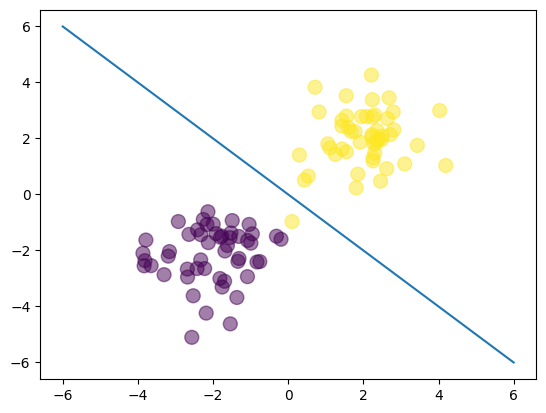

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=T, s=100, alpha=0.5)
x_axis = np.linspace(-6, 6, 100)
y_axis = -x_axis
plt.plot(x_axis, y_axis)
plt.show()

### Maximum Likelihood

Example:

Given a coin, p(H)= p, p(T)= 1-p.

If N=10, 7H and 3T

$
L = p^7 (1-p)^3 \\
l = \log[p^7(1-p)^3]  \\
= \log p^7 + \log(1-p)^3 \\
= 7 \log p + 3 \log(1-p) \\
l' = 7/p + 3/(1-p)(-1) = 0 \\
p = 7/10 = p(H)
$

Now if

$$
p(y=1|x) = \sigma(w^Tx) = y \\
L = \prod_{n=1}^N y_n^{t_n} (1-y_n)^{1-t_n}
$$

Log likelihood would be:

$$
l = \sum_{n=1}^N t_n \log y_n (1-t_n) \log (1-y_n)
$$

Maximizing likelihood is the same as minimizing the cross entropy

### Minimizing Cost

Using gradient descent we can minimize the cost

wrt $y_n$

$$
J = -\sum_{n=1}^N \{ t_n \log(y_n) + (1-t_n) \log(1-y_n) \}
\\[1cm]
\frac{\partial J}{\partial y_n} = - t_n\frac{1}{y_n}+ (1-t_n)\frac{1}{1-y_n}(-1) \\[1cm]
$$

wrt $a_n$

$$
y_n = \sigma(a_n) = \frac{1}{1+e^{-a_n}} \\
\frac{\partial y_n}{\partial a_n} = \frac{-1}{(1+e^{-a_n})^2}(e^{-a_n})(-1) \\
= \frac{e^{-a_n}}{(1+e^{-a_n})^2} \\
= \frac{1}{1+e^{-a_n}}\frac{e^{-a_n}}{1+e^{-a_n}} \\
= y_n (1-y_n) \\[1cm]
$$

wrt $w_i$

$$
a_n = w^T x_n \\
a_n = w_0x_{n0} + w_1 x_{n1} + w_2x_{n2} + \cdots \\
\frac{\partial a_n}{\partial w_i} =
x_{ni} \\[1cm]
$$

**Putting all together:**

$$
\frac{\partial J}{\partial w_i} = \sum_{n=1}^N (y_n - t_n) x_{ni} \\
$$

Vectorizing further

$$
\frac{\partial J}{\partial w} = X^T (Y-T)\\
$$

#### Python Implementation

In [6]:
# demonstrates how to do gradient descent with numpy matrices.

# https://deeplearningcourses.com/c/data-science-logistic-regression-in-python
import numpy as np
import matplotlib.pyplot as plt

N = 100
D = 2

N_per_class = N//2


X = np.random.randn(N,D)

# center the first 50 points at (-2,-2)
X[:N_per_class,:] = X[:N_per_class,:] - 2*np.ones((N_per_class,D))

# center the last 50 points at (2, 2)
X[N_per_class:,:] = X[N_per_class:,:] + 2*np.ones((N_per_class,D))

# labels: first N_per_class are 0, last N_per_class are 1
T = np.array([0]*N_per_class + [1]*N_per_class)

In [7]:
# add a column of ones
# ones = np.array([[1]*N]).T # old
ones = np.ones((N, 1))
Xb = np.concatenate((ones, X), axis=1)

# randomly initialize the weights
w = np.random.randn(D + 1)

# calculate the model output
z = Xb.dot(w)

In [8]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))


Y = sigmoid(z)

# calculate the cross-entropy error
def cross_entropy(T, Y):
    E = 0
    for i in range(len(T)):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

In [9]:
# let's do gradient descent 100 times
learning_rate = 0.1
for i in range(100):
    if i % 10 == 0:
        print(cross_entropy(T, Y))

    # gradient descent weight udpate
    w += learning_rate * Xb.T.dot(T - Y)

    # recalculate Y
    Y = sigmoid(Xb.dot(w))


print("Final w:", w)

51.97566857765129
0.013642684111579208
0.013375389753201038
0.013120575574007627
0.012877366850219209
0.012644969392055373
0.012422660439318719
0.012209780768686047
0.012005727828204457
0.011809949746038396
Final w: [0.09844667 7.08719041 6.44694455]


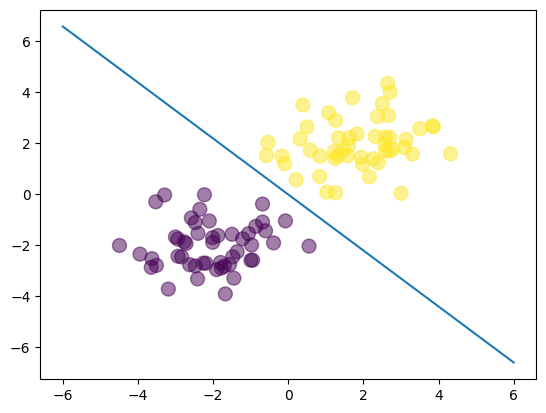

In [10]:

# plot the data and separating line
plt.scatter(X[:,0], X[:,1], c=T, s=100, alpha=0.5)
x_axis = np.linspace(-6, 6, 100)
y_axis = -(w[0] + x_axis*w[1]) / w[2]
plt.plot(x_axis, y_axis)
plt.show()

# Resources

- [Deep Learning Prerequisites: Linear Regression in Python by Lazy Programmer](https://deeplearningcourses.com/c/data-science-linear-regression-in-python)
- [Deep Learning Prerequisites: Logistic Regression in Python by Lazy Programmer](https://deeplearningcourses.com/c/data-science-logistic-regression-in-python)